# Project Two
## Pavan M Reddy

## Task 1.1

In [41]:
'''#Intro to Neural Network Modeling 
# Python Neural Network Model of Spray Cooling Test System

>>>>> start CodeP2.1F22
    V.P. Carey, ME249, Fall 2022'''

# version 3 print function
from __future__ import print_function

# import math, numpy and other usefuk packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas


#assembling data array
#store array where rows are data vectors [x01, x02, x03, y3]
xydata = []

xydata = [[20./20.2, 13.0/14.5, 310.8/308.0, 30.97/32.4], [20./20.2, 14.5/14.5, 308.0/308.0, 32.3/32.4]]
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.5/32.4])
xydata.append([20.2/20.2, 13.0/14.5, 310.8/308.0, 30.91/32.4]) 
xydata.append([20./20.2, 14.5/14.5, 308.0/308.0, 32.5/32.4]) 
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.4/32.4]) 
xydata.append([24./20.2, 13.0/14.5, 310.8/308.0, 35.59/32.4]) 
xydata.append([36./20.2, 14.5/14.5, 308.0/308.0, 46.4/32.4]) 
print (xydata)

#set starting values 
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

#start of batch loop  

for k in range (0,200):
    icount = 0
    #initialize error and derivative parameters
    E3ti = 0.
    dE3da3 = 0.
    dE3dw01ti = 0.
    dE3dw02ti = 0.
    dE3dw03ti = 0.
    dE3db1ti = 0.
    dE3dw12ti = 0.
    dE3db2ti = 0.
    dE3dw23ti = 0.
    dE3db3ti = 0.
 
    w01 = w01n 
    w02 = w02n
    w03 = w03n
    b1 = b1n 
    w12 = w12n
    b2 = b2n 
    w23 = w23n 
    b3 = b3n 
    
    #doing calcuations for each data point 
    for i in range(0,8):
        #compute activation functions and their derivatives
        z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
        sig1 = z1
        sigp1 = 1.0
        if z1 < 0.0:
            sig1 = math.exp(z1) - 1.0
            sigp1 = math.exp(z1)
        a1 = sig1

        z2 = w12*a1+b2 
        sig2 = z2
        sigp2 = 1.0
        if z2 < 0.0:
            sig2 = math.exp(z2) - 1.0
            sigp2 = math.exp(z2)
        a2 = sig2

        z3 = w23*a2+b3 
        sig3 = z3
        sigp3 = 1.0
        if z3 < 0.0:
            sig3 = math.exp(z3) - 1.0
            sigp3 = math.exp(z3)
        a3 = sig3
        
        
        #compute derivatives for backpropagation
        #add to sum for batch average calculation
        E3ti = E3ti +(a3 - xydata[i][3])*(a3 - xydata[i][3])
        dE3da3 = 2.*(a3 - xydata[i][3])
        
        dE3dw01ti = dE3dw01ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][0]
        dE3dw02ti = dE3dw02ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][1]
        dE3dw03ti = dE3dw03ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][2]
        dE3db1ti = dE3db1ti + dE3da3*sigp3*w23*sigp2*w12*sigp1
        
        dE3dw12ti = dE3dw12ti + dE3da3*sigp3*w23*sigp2*a1
        dE3db2ti = dE3db2ti + dE3da3*sigp3*w23*sigp2
        
        dE3dw23ti = dE3dw23ti + dE3da3*sigp3*a2
        dE3db3ti = dE3db3ti + dE3da3*sigp3
        
        icount = i + 1
        # end  calculations for each data point in batch
        
    #compute batch averaged values
    E3 = E3ti/icount
    dE3dw01 = dE3dw01ti/icount
    dE3dw02 = dE3dw02ti/icount
    dE3dw03 = dE3dw03ti/icount
    dE3db1 = dE3db1ti/icount
    dE3dw12 = dE3dw12ti/icount
    dE3db2 = dE3db2ti/icount
    dE3dw23 = dE3dw23ti/icount
    dE3db3 = dE3db3ti/icount
    
    #set gam = learning rate
    gam = 0.165
    if E3 < 0.07: 
        gam = 0.08

    w01n = w01 + gam*(-E3)/dE3dw01
    w02n = w02 + gam*(-E3)/dE3dw02
    w03n = w03 + gam*(-E3)/dE3dw03
    b1n = b1 + gam*(-E3)/dE3db1
    w12n = w12 + gam*(-E3)/dE3dw12
    b2n = b2 + gam*(-E3)/dE3db2
    
    w23n = w23 + gam*(-E3)/dE3dw23
    b3n = b3 + gam*(-E3)/dE3db3
    
    #printing for each iteration
    print ('last w01, w02, w03, w12, w23:')
    print ('last b1, b2, b3:')
    print (w01, w02, w03, w12, w23)
    print (b1, b2, b3)
    print ('E3 = ', E3, 'icount =', icount)
    print ('next ws:', w01n, w02n, w03n, w12n, w23n)
    print ('next bs:', b1n, b2n, b3n)
    
    #quit if squared error is below target
    if E3 < 0.00035:
        break
    

print ('last w01, w02, w03, w12, w23:')
print ('last b1, b2, b3:')
print (w01, w02, w03, w12, w23)
print (b1, b2, b3)
#decomment print statements below if you want to print neuron outputs
#print ('z1 =', z1)
#print ('a1 =', a1)
#print ('z2 =', z2)
#print ('a2 =', a2)
#print ('z3 =', z3)
#print ('a3 =', a3)

#print comparison of data and trained network predictions
# restore raw data values  
xydatar = [[20., 13.0, 310.8, 30.97], [20., 14.5, 308.0, 32.3]]
xydatar.append([20., 15.3, 306.0, 31.5])
xydatar.append([20.2, 13.0, 310.8, 30.91]) 
xydatar.append([20., 14.5, 308.0, 32.5]) 
xydatar.append([20., 15.3, 306.0, 31.4]) 
xydatar.append([24., 13.0, 310.8, 35.59]) 
xydatar.append([36., 14.5, 308.0, 46.4])
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
Y3_FP = []
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    Y3_FP.append(a3*32.4)
%store Y3_FP
    


[[0.9900990099009901, 0.896551724137931, 1.009090909090909, 0.9558641975308642], [0.9900990099009901, 1.0, 1.0, 0.9969135802469136], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9722222222222222], [1.0, 0.896551724137931, 1.009090909090909, 0.9540123456790124], [0.9900990099009901, 1.0, 1.0, 1.0030864197530864], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9691358024691358], [1.188118811881188, 0.896551724137931, 1.009090909090909, 1.098456790123457], [1.7821782178217822, 1.0, 1.0, 1.4320987654320987]]
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.23 0.4 0.7 0.72 0.7
-0.15 -0.12 0.01
E3 =  0.0023304004322608684 icount = 8
next ws: 1.2264341588876744 0.3957113223001962 0.6957952455947807 0.7187347373356996 0.6986778919002751
next bs: -0.15420935585818193 -0.123030736217891 0.0078784846474763
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.2264341588876744 0.3957113223001962 0.6957952455947807 0.7187347373356996 0.6986778919002751
-0.15420935585818

## Task 1.2

### a)

In [3]:
'''>>>>> start CodeP2.2F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 

#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

Using TensorFlow backend.


0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [15]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])


#set starting values to those used in first principles model
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)


print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
model.layers


(3, 1)
(1, 1)
(1, 1)
Weights and biases of the layers before training the model: 

dense_one
Weights
Shape:  (3, 1) 
 [[1.23]
 [0.4 ]
 [0.7 ]]
Bias
Shape:  (1,) 
 [-0.15] 

dense_two
Weights
Shape:  (1, 1) 
 [[0.72]]
Bias
Shape:  (1,) 
 [-0.12] 

dense_three
Weights
Shape:  (1, 1) 
 [[0.7]]
Bias
Shape:  (1,) 
 [0.01] 



In [21]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.00035)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [24]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
8/8 [==============================] - 0s 535us/step - loss: 0.0142
Epoch 2/400
8/8 [==============================] - 0s 167us/step - loss: 0.0143
Epoch 3/400
8/8 [==============================] - 0s 178us/step - loss: 0.0143
Epoch 4/400
8/8 [==============================] - 0s 173us/step - loss: 0.0142
Epoch 5/400
8/8 [==============================] - 0s 155us/step - loss: 0.0143
Epoch 6/400
8/8 [==============================] - 0s 187us/step - loss: 0.0142
Epoch 7/400
8/8 [==============================] - 0s 181us/step - loss: 0.0143
Epoch 8/400
8/8 [==============================] - 0s 149us/step - loss: 0.0143
Epoch 9/400
8/8 [==============================] - 0s 171us/step - loss: 0.0142
Epoch 10/400
8/8 [==============================] - 0s 155us/step - loss: 0.0143
Epoch 11/400
8/8 [==============================] - 0s 159us/step - loss: 0.0142
Epoch 12/400
8/8 [==============================] - 0s 153us/step - loss: 0.0143
Epoch 13/400
8/8 [===================

### a)

In [40]:
from __future__ import print_function
#For results of training network:
#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
Y3_keras = []
Y3_data = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    Y3_keras.append(a3*32.4)
    Y3_data.append(df.y3[i]*32.4)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)
%store Y3_keras
%store Y3_data

[[1.2167145 ]
 [0.31941473]
 [0.72139275]]
w01 =  1.2167145 w02 =  0.31941473 w03 =  0.72139275
[-0.13823985]
b1 =  [-0.13823985]
[[0.7061412]]
w12 =  0.7061412
[-0.10798812]
b2 =  [-0.10798812]
[[0.68419325]]
w23 =  0.68419325
[0.02227388]
b3 =  [0.02227388]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[0.9536769]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.9664727]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.97272366]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[0.95949703]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.9664727]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.97854394]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.0700808]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.4320883]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[30.899132]]
20.0 14.5 3

### c)

[30.969044165303533, 32.29900311718774, 31.499027807783705, 30.909046017098234, 32.498996944538746, 31.3990308941082, 35.58890157711182, 46.398567945433776]
[31.090793913544566, 31.678835486931895, 31.973926195676942, 31.27579387700364, 31.678835486931895, 31.973926195676942, 34.79079318272606, 46.47883256365786]


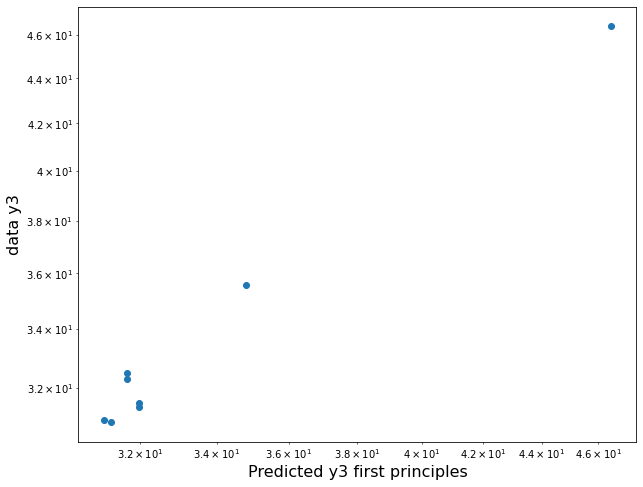

[30.969044165303533, 32.29900311718774, 31.499027807783705, 30.909046017098234, 32.498996944538746, 31.3990308941082, 35.58890157711182, 46.398567945433776]
[array([[30.899132]], dtype=float32), array([[31.313717]], dtype=float32), array([[31.516249]], dtype=float32), array([[31.087706]], dtype=float32), array([[31.313717]], dtype=float32), array([[31.704824]], dtype=float32), array([[34.67062]], dtype=float32), array([[46.399662]], dtype=float32)]


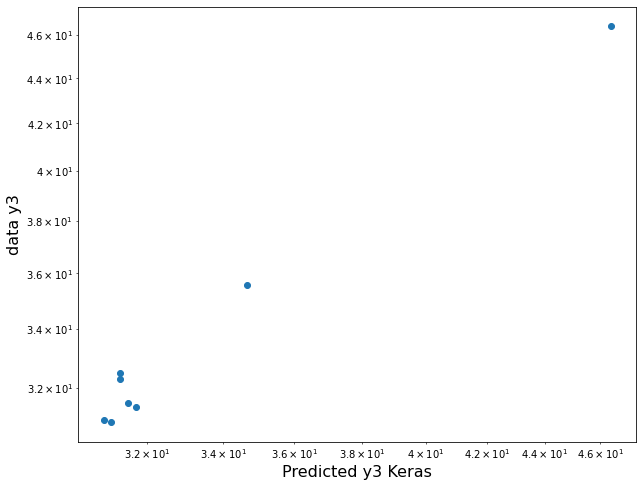

In [47]:
#Plot predicted y3 vs. data y3
#First principles
import matplotlib.pyplot as plt
import numpy as np
print(Y3_data)
print(Y3_FP)
plt.scatter(Y3_FP,Y3_data)
plt.xlabel('Predicted y3 first principles', fontsize='16')
plt.ylabel('data y3', fontsize='16')
plt.loglog()
plt.show()
#Keras
import matplotlib.pyplot as plt
import numpy as np
print(Y3_data)
print(Y3_keras)
plt.scatter(Y3_keras,Y3_data)
plt.xlabel('Predicted y3 Keras', fontsize='16')
plt.ylabel('data y3', fontsize='16')
plt.loglog()
plt.show()

### d)

In [48]:
'''#Intro to Neural Network Modeling 
# Python Neural Network Model of Spray Cooling Test System

>>>>> start CodeP2.1F22
    V.P. Carey, ME249, Fall 2022'''

# version 3 print function
from __future__ import print_function

# import math, numpy and other usefuk packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 8] # for square canvas


#assembling data array
#store array where rows are data vectors [x01, x02, x03, y3]
xydata = []

xydata = [[20./20.2, 13.0/14.5, 310.8/308.0, 30.97/32.4], [20./20.2, 14.5/14.5, 308.0/308.0, 32.3/32.4]]
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.5/32.4])
xydata.append([20.2/20.2, 13.0/14.5, 310.8/308.0, 30.91/32.4]) 
xydata.append([20./20.2, 14.5/14.5, 308.0/308.0, 32.5/32.4]) 
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.4/32.4]) 
xydata.append([24./20.2, 13.0/14.5, 310.8/308.0, 35.59/32.4]) 
xydata.append([36./20.2, 14.5/14.5, 308.0/308.0, 46.4/32.4]) 
print (xydata)

#set starting values 
w01n =  1.23*1.2 
w02n =  0.40 *1.2
w03n =  0.70*1.2
b1n =  -0.15*1.2
w12n =  0.72*1.2
b2n =  -0.12*1.2
w23n =  0.7*1.2
b3n =  0.01*1.2

#start of batch loop  

for k in range (0,200):
    icount = 0
    #initialize error and derivative parameters
    E3ti = 0.
    dE3da3 = 0.
    dE3dw01ti = 0.
    dE3dw02ti = 0.
    dE3dw03ti = 0.
    dE3db1ti = 0.
    dE3dw12ti = 0.
    dE3db2ti = 0.
    dE3dw23ti = 0.
    dE3db3ti = 0.
 
    w01 = w01n 
    w02 = w02n
    w03 = w03n
    b1 = b1n 
    w12 = w12n
    b2 = b2n 
    w23 = w23n 
    b3 = b3n 
    
    #doing calcuations for each data point 
    for i in range(0,8):
        #compute activation functions and their derivatives
        z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
        sig1 = z1
        sigp1 = 1.0
        if z1 < 0.0:
            sig1 = math.exp(z1) - 1.0
            sigp1 = math.exp(z1)
        a1 = sig1

        z2 = w12*a1+b2 
        sig2 = z2
        sigp2 = 1.0
        if z2 < 0.0:
            sig2 = math.exp(z2) - 1.0
            sigp2 = math.exp(z2)
        a2 = sig2

        z3 = w23*a2+b3 
        sig3 = z3
        sigp3 = 1.0
        if z3 < 0.0:
            sig3 = math.exp(z3) - 1.0
            sigp3 = math.exp(z3)
        a3 = sig3
        
        
        #compute derivatives for backpropagation
        #add to sum for batch average calculation
        E3ti = E3ti +(a3 - xydata[i][3])*(a3 - xydata[i][3])
        dE3da3 = 2.*(a3 - xydata[i][3])
        
        dE3dw01ti = dE3dw01ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][0]
        dE3dw02ti = dE3dw02ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][1]
        dE3dw03ti = dE3dw03ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][2]
        dE3db1ti = dE3db1ti + dE3da3*sigp3*w23*sigp2*w12*sigp1
        
        dE3dw12ti = dE3dw12ti + dE3da3*sigp3*w23*sigp2*a1
        dE3db2ti = dE3db2ti + dE3da3*sigp3*w23*sigp2
        
        dE3dw23ti = dE3dw23ti + dE3da3*sigp3*a2
        dE3db3ti = dE3db3ti + dE3da3*sigp3
        
        icount = i + 1
        # end  calculations for each data point in batch
        
    #compute batch averaged values
    E3 = E3ti/icount
    dE3dw01 = dE3dw01ti/icount
    dE3dw02 = dE3dw02ti/icount
    dE3dw03 = dE3dw03ti/icount
    dE3db1 = dE3db1ti/icount
    dE3dw12 = dE3dw12ti/icount
    dE3db2 = dE3db2ti/icount
    dE3dw23 = dE3dw23ti/icount
    dE3db3 = dE3db3ti/icount
    
    #set gam = learning rate
    gam = 0.165
    if E3 < 0.07: 
        gam = 0.08

    w01n = w01 + gam*(-E3)/dE3dw01
    w02n = w02 + gam*(-E3)/dE3dw02
    w03n = w03 + gam*(-E3)/dE3dw03
    b1n = b1 + gam*(-E3)/dE3db1
    w12n = w12 + gam*(-E3)/dE3dw12
    b2n = b2 + gam*(-E3)/dE3db2
    
    w23n = w23 + gam*(-E3)/dE3dw23
    b3n = b3 + gam*(-E3)/dE3db3
    
    #printing for each iteration
    print ('last w01, w02, w03, w12, w23:')
    print ('last b1, b2, b3:')
    print (w01, w02, w03, w12, w23)
    print (b1, b2, b3)
    print ('E3 = ', E3, 'icount =', icount)
    print ('next ws:', w01n, w02n, w03n, w12n, w23n)
    print ('next bs:', b1n, b2n, b3n)
    
    #quit if squared error is below target
    if E3 < 0.00035:
        break
    

print ('last w01, w02, w03, w12, w23:')
print ('last b1, b2, b3:')
print (w01, w02, w03, w12, w23)
print (b1, b2, b3)
#decomment print statements below if you want to print neuron outputs
#print ('z1 =', z1)
#print ('a1 =', a1)
#print ('z2 =', z2)
#print ('a2 =', a2)
#print ('z3 =', z3)
#print ('a3 =', a3)

#print comparison of data and trained network predictions
# restore raw data values  
xydatar = [[20., 13.0, 310.8, 30.97], [20., 14.5, 308.0, 32.3]]
xydatar.append([20., 15.3, 306.0, 31.5])
xydatar.append([20.2, 13.0, 310.8, 30.91]) 
xydatar.append([20., 14.5, 308.0, 32.5]) 
xydatar.append([20., 15.3, 306.0, 31.4]) 
xydatar.append([24., 13.0, 310.8, 35.59]) 
xydatar.append([36., 14.5, 308.0, 46.4])
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
Y3_FP = []
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    Y3_FP.append(a3*32.4)
%store Y3_FP
    


[[0.9900990099009901, 0.896551724137931, 1.009090909090909, 0.9558641975308642], [0.9900990099009901, 1.0, 1.0, 0.9969135802469136], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9722222222222222], [1.0, 0.896551724137931, 1.009090909090909, 0.9540123456790124], [0.9900990099009901, 1.0, 1.0, 1.0030864197530864], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9691358024691358], [1.188118811881188, 0.896551724137931, 1.009090909090909, 1.098456790123457], [1.7821782178217822, 1.0, 1.0, 1.4320987654320987]]
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.476 0.48 0.84 0.864 0.84
-0.18 -0.144 0.012
E3 =  0.7524187529130215 icount = 8
next ws: 1.389586920811888 0.3778290672663652 0.7404347683861738 0.8335888649876556 0.8085858514025894
next bs: -0.2797345528128705 -0.23017065363032008 -0.06038334904946889
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.389586920811888 0.3778290672663652 0.7404347683861738 0.8335888649876556 0.8085858514025894
-0.279734552

In [50]:
'''>>>>> start CodeP2.2F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 

#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [51]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])


#set starting values to those used in first principles model
w01n =  1.23 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.7
b3n =  0.01

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)


print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
model.layers


(3, 1)
(1, 1)
(1, 1)
Weights and biases of the layers before training the model: 

dense_one
Weights
Shape:  (3, 1) 
 [[1.23]
 [0.4 ]
 [0.7 ]]
Bias
Shape:  (1,) 
 [-0.15] 

dense_two
Weights
Shape:  (1, 1) 
 [[0.72]]
Bias
Shape:  (1,) 
 [-0.12] 

dense_three
Weights
Shape:  (1, 1) 
 [[0.7]]
Bias
Shape:  (1,) 
 [0.01] 



In [52]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.00035)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [54]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
8/8 [==============================] - 0s 685us/step - loss: 0.0148
Epoch 2/400
8/8 [==============================] - 0s 180us/step - loss: 0.0147
Epoch 3/400
8/8 [==============================] - 0s 156us/step - loss: 0.0147
Epoch 4/400
8/8 [==============================] - 0s 193us/step - loss: 0.0148
Epoch 5/400
8/8 [==============================] - 0s 194us/step - loss: 0.0147
Epoch 6/400
8/8 [==============================] - 0s 188us/step - loss: 0.0148
Epoch 7/400
8/8 [==============================] - 0s 204us/step - loss: 0.0147
Epoch 8/400
8/8 [==============================] - 0s 158us/step - loss: 0.0147
Epoch 9/400
8/8 [==============================] - 0s 197us/step - loss: 0.0148
Epoch 10/400
8/8 [==============================] - 0s 185us/step - loss: 0.0147
Epoch 11/400
8/8 [==============================] - 0s 196us/step - loss: 0.0148
Epoch 12/400
8/8 [==============================] - 0s 167us/step - loss: 0.0147
Epoch 13/400
8/8 [===================

In [55]:
from __future__ import print_function
#For results of training network:
#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
Y3_keras = []
Y3_data = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    Y3_keras.append(a3*32.4)
    Y3_data.append(df.y3[i]*32.4)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)
%store Y3_keras
%store Y3_data

[[1.2100601 ]
 [0.37602067]
 [0.7082452 ]]
w01 =  1.2100601 w02 =  0.37602067 w03 =  0.7082452
[-0.14468023]
b1 =  [-0.14468023]
[[0.7057381]]
w12 =  0.7057381
[-0.11462832]
b2 =  [-0.11462832]
[[0.6842814]]
w23 =  0.6842814
[0.01542608]
b3 =  [0.01542608]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[0.9536409]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.9693167]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.9771144]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[0.95942676]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.9693167]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.9829002]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.069357]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.4321812]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[30.897966]]
20.0 14.5 308.0 3

## Task 2.1


In [18]:
'''>>>>> start CodeP2.3F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Data arrays for hybrid solar/fossil-fuel gas turbine power system'''

'''
#create input data array, normalizing input temp
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0 , 0.0 , 500.0 ], [ 318.0 , 0.0 , 1000.0 ]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])
  '''

'''
ydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])
  '''

'\nydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]\nydata.append([ 47.4620 , 0.3930 ])\nydata.append([ 57.5639 , 0.39949 ])\nydata.append([ 73.1286 , 0.40612 ])\nydata.append([ 49.1110 , 0.4023 ])\nydata.append([ 56.4428 , 0.40605 ])\nydata.append([ 66.3479 , 0.4098 ])\nydata.append([ 80.4695 , 0.413 ])\nydata.append([ 102.2276 , 0.4175 ])\nydata.append([ 63.0904 , 0.41540 ])\nydata.append([ 72.5092 , 0.4175 ])\nydata.append([ 85.2338, 0.4197 ])\nydata.append([ 103.3750 , 0.42192 ])\nydata.append([ 131.3266 , 0.4242 ])\n  \nydata.append([ 34.273 , 0.3952 ])\nydata.append([ 38.99026 , 0.4012 ])\nydata.append([ 45.2133, 0.4073 ])\nydata.append([ 53.8000 , 0.4136 ])\nydata.append([ 66.4130 , 0.4201 ])\nydata.append([ 47.922 , 0.4178 ])\nydata.append([ 54.518 , 0.4215 ])\nydata.append([ 63.220 , 0.4252 ])\nydata.append([ 75.226 , 0.4290 ])\nydata.append([ 92.862 , 0.4329 ])\nydata.append([ 61.572 , 0.4315 ])\nydata.append([ 70.0468 , 0.43373 ])\nydata.append([ 81.226 , 0.43597 ])\nyd

In [19]:
'''>>>>> start CodeP2.4F22
    V.P. Carey ME249, Fall 2022

Intro to Neural Network Modeling 
Keras model for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
# meadian values of input variables
Tmed = 293.
gamed = 0.25
qsmed = 1250.
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0, 0.0, 500.0], [ 318.0, 0.0, 1000.0]]
xdata.append([ 318.0, 0.0, 1500.0])
xdata.append([ 318.0, 0.0, 2000.0])
xdata.append([ 318.0, 0.0, 2500.0])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])

''' #convert to:
xdata =  [[ 318.0/Tmed , 0.0/gamed , 500.0/qsmed ], [ 318.0/Tmed , 0.0/gamed , 1000.0/qsmed ]]
xdata.append([ 318.0/Tmed  , 0.0/gamed , 1500.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2000.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2500.0/qsmed ])'''
#narmalizing the ydata using the median value.
medianx=np.median(xdata,axis=0)
print(medianx)
Tmed=medianx[0]
gamed=medianx[1]
qsmed=medianx[2]
Nx = []
for i in range(len(xdata)):
    Nx.append([ xdata[i][0]/Tmed , xdata[i][1]/gamed , xdata[i][2]/qsmed ])
xdata = Nx

xarray= np.array(xdata)
#print (xdata)
print ('xdata:', xarray)
# meadian values of output variables
almed = 60.
efmed = 0.4
# alpha, effsys
ydata = []
ydata =  [[ 35.1316, 0.3808], [ 40.3764, 0.38686]]
ydata.append([ 47.4620, 0.3930])
ydata.append([ 57.5639, 0.39949])
ydata.append([ 73.1286, 0.40612])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])

'''#convert to:
ydata =  [[ 35.1316/almed , 0.3808/efmed ], [ 40.3764/almed , 0.38686/efmed ]]
ydata.append([ 47.4620/almed , 0.3930/efmed ])
ydata.append([ 57.5639/almed , 0.39949/efmed ])
ydata.append([ 73.1286/almed , 0.40612/efmed ])'''
#narmalizing the ydata using the median value.
mediany=np.median(ydata,axis=0)
print(mediany)
almed=mediany[0]
efmed=mediany[1]
Ny=[]
for i in range(len(ydata)):
    Ny.append([ ydata[i][0]/almed , ydata[i][1]/efmed ])
ydata=Ny
yarray= np.array(ydata)
#print (ydata)
print ('ydata:', yarray)
%store xarray
%store yarray

[2.955e+02 2.500e-01 1.500e+03]
xdata: [[1.07614213 0.         0.33333333]
 [1.07614213 0.         0.66666667]
 [1.07614213 0.         1.        ]
 [1.07614213 0.         1.33333333]
 [1.07614213 0.         1.66666667]
 [1.07614213 1.         0.33333333]
 [1.07614213 1.         0.66666667]
 [1.07614213 1.         1.        ]
 [1.07614213 1.         1.33333333]
 [1.07614213 1.         1.66666667]
 [1.07614213 2.         0.33333333]
 [1.07614213 2.         0.66666667]
 [1.07614213 2.         1.        ]
 [1.07614213 2.         1.33333333]
 [1.07614213 2.         1.66666667]
 [1.02538071 0.         0.33333333]
 [1.02538071 0.         0.66666667]
 [1.02538071 0.         1.        ]
 [1.02538071 0.         1.33333333]
 [1.02538071 0.         1.66666667]
 [1.02538071 1.         0.33333333]
 [1.02538071 1.         0.66666667]
 [1.02538071 1.         1.        ]
 [1.02538071 1.         1.33333333]
 [1.02538071 1.         1.66666667]
 [1.02538071 2.         0.33333333]
 [1.02538071 2.         0

## Task 2.2

### a)

In [20]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(16, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(32, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [21]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


### b)

In [22]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
60/60 [==============================] - 0s 6ms/step - loss: 7.1724
Epoch 2/600
60/60 [==============================] - 0s 59us/step - loss: 5.8566
Epoch 3/600
60/60 [==============================] - 0s 62us/step - loss: 5.0474
Epoch 4/600
60/60 [==============================] - 0s 70us/step - loss: 4.4274
Epoch 5/600
60/60 [==============================] - 0s 63us/step - loss: 3.9182
Epoch 6/600
60/60 [==============================] - 0s 66us/step - loss: 3.4910
Epoch 7/600
60/60 [==============================] - 0s 67us/step - loss: 3.1367
Epoch 8/600
60/60 [==============================] - 0s 65us/step - loss: 2.8423
Epoch 9/600
60/60 [==============================] - 0s 71us/step - loss: 2.5930
Epoch 10/600
60/60 [==============================] - 0s 61us/step - loss: 2.3717
Epoch 11/600
60/60 [==============================] - 0s 62us/step - loss: 2.1742
Epoch 12/600
60/60 [==============================] - 0s 73us/step - loss: 1.9920
Epoch 13/600
60/60 [======

<function matplotlib.pyplot.show(close=None, block=None)>

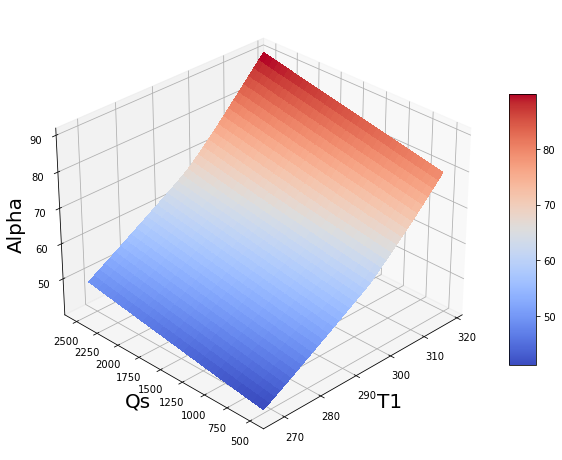

In [24]:
import numpy as np
# creating a surface plot
import matplotlib.pyplot as plt
test = []
outpt=[]
T1 = np.linspace( 268,318,num=35)
Qs = np.linspace(500,2500,num=35)
Z = np.zeros((len(Qs),len(T1)))
for i in range(len(T1)):
    for j in range(len(Qs)):
        test = [[ T1[i]/Tmed , 0.25/gamed , Qs[j]/qsmed ]]
        testarray = np.array(test)
        outpt = model.predict(testarray)
        Z[i][j]=outpt[0][0]*almed
X,Y = np.meshgrid(T1,Qs)
fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches(10,10)

        
surf = ax.plot_surface(X,Y, Z, cmap=plt.cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_xlabel('T1', fontsize=20)
ax.set_ylabel('Qs', fontsize = 20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Alpha', fontsize = 20, rotation = 90)
fig.colorbar(surf,shrink=0.5,aspect=10)

ax.view_init(30,225)

plt.show

## Task 2.3

### a)

[[1.0761421319796953, 0.0, 0.3333333333333333], [1.0761421319796953, 0.0, 1.0], [1.0761421319796953, 0.0, 1.6666666666666667], [1.0761421319796953, 1.0, 1.0], [1.0761421319796953, 2.0, 0.3333333333333333], [1.0761421319796953, 2.0, 1.0], [1.0761421319796953, 2.0, 1.6666666666666667], [1.0253807106598984, 0.0, 0.6666666666666666], [1.0253807106598984, 0.0, 1.3333333333333333], [1.0253807106598984, 1.0, 0.6666666666666666], [1.0253807106598984, 1.0, 1.3333333333333333], [1.0253807106598984, 2.0, 0.6666666666666666], [1.0253807106598984, 2.0, 1.3333333333333333], [0.9746192893401016, 0.0, 0.3333333333333333], [0.9746192893401016, 0.0, 1.6666666666666667], [0.9746192893401016, 1.0, 1.6666666666666667], [0.9746192893401016, 2.0, 1.0], [0.9069373942470389, 0.0, 1.0], [0.9069373942470389, 1.0, 1.3333333333333333], [0.9069373942470389, 2.0, 1.6666666666666667]]
[[0.5741195158961486, 0.8814814814814815], [0.7756251700663596, 0.9097222222222223], [1.1949791916403754, 0.9400462962962963], [1.0841

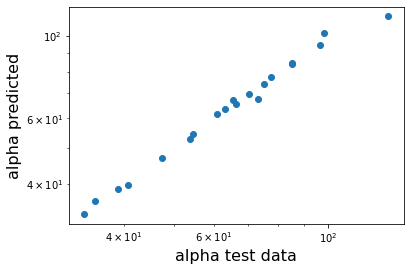

Rmse deviation of alpha test from alpha predicted: 4.525983397229046


In [26]:
#Test data(distinct from training data) provided for predicting alpha 
import math
testDataX = []
testDataX.append([ 318.0 , 0.0 , 500.0 ])
testDataX.append([ 318.0 , 0.0 , 1500.0 ])
testDataX.append([ 318.0 , 0.0 , 2500.0 ])
testDataX.append([ 318.0 , 0.25 , 1500.0 ])
testDataX.append([ 318.0 , 0.5 , 500.0 ])
testDataX.append([ 318.0 , 0.5 , 1500.0 ])
testDataX.append([ 318.0 , 0.5 , 2500.0 ])
testDataX.append([ 303.0 , 0.0 , 1000.0 ])
testDataX.append([ 303.0 , 0.0 , 2000.0 ])
testDataX.append([ 303.0 , 0.25 , 1000.0 ])
testDataX.append([ 303.0 , 0.25 , 2000.0 ])
testDataX.append([ 303.0 , 0.5 , 1000.0 ])
testDataX.append([ 303.0 , 0.5 , 2000.0 ])
testDataX.append([ 288.0 , 0.0 , 500.0 ])
testDataX.append([ 288.0 , 0.0 , 2500.0 ])
testDataX.append([ 288.0 , 0.25 , 2500.0 ])
testDataX.append([ 288.0 , 0.5 , 1500.0 ])
testDataX.append([ 268.0 , 0.0 , 1500.0 ])
testDataX.append([ 268.0 , 0.25 , 2000.0 ])
testDataX.append([ 268.0 , 0.5 , 2500.0 ])

testDataY = []
testDataY.append([ 35.13 , 0.3808 ])
testDataY.append([ 47.46 , 0.3930 ])
testDataY.append([ 73.12 , 0.4061 ])
testDataY.append([ 66.34 , 0.4098 ])
testDataY.append([ 63.09, 0.4154 ])
testDataY.append([ 85.23 , 0.4197 ])
testDataY.append([131.32 , 0.4242 ])
testDataY.append([ 38.99 , 0.4012 ])
testDataY.append([ 53.80 , 0.4136 ])
testDataY.append([ 54.51 , 0.4215 ])
testDataY.append([ 75.22 , 0.4290 ])
testDataY.append([ 70.04, 0.4337 ])
testDataY.append([ 96.65, 0.4382 ])
testDataY.append([ 33.45 , 0.4091 ])
testDataY.append([ 60.80 , 0.4334 ])
testDataY.append([ 85.044, 0.4477])
testDataY.append([ 77.56 , 0.4516 ])
testDataY.append([ 40.68 , 0.4383 ])
testDataY.append([ 65.24 , 0.4628 ])
testDataY.append([ 98.23 , 0.4760 ])

#normalizing the test data using the median values calculated using the training data
Nx = []
for i in range(len(testDataX)):
    Nx.append([ testDataX[i][0]/Tmed , testDataX[i][1]/gamed , testDataX[i][2]/qsmed ])
testDataX = Nx
Ny=[]
altest=[]
for i in range(len(testDataY)):
    altest.append(testDataY[i][0])
    Ny.append([ testDataY[i][0]/almed , testDataY[i][1]/efmed ])
testDataY=Ny
print(testDataX)
print(testDataY)
alpred=[]
#calculating the predicted alpha using the model predict function
for i in range(len(testDataX)):
    test = [[ testDataX[i][0] , testDataX[i][1] , testDataX[i][2] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alpred.append(outpt[0][0]*almed)
print(altest)
print(alpred)
#plot alpha test data vs. alpha predicted
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(altest,alpred)
plt.xlabel('alpha test data', fontsize='16')
plt.ylabel('alpha predicted', fontsize='16')
plt.loglog()
plt.show()

#calculate the rmse value     
MSE = np.square(np.subtract(alpred,altest)).mean() 
RMSE = math.sqrt(MSE)
print("Rmse deviation of alpha test from alpha predicted:", RMSE)

### b)

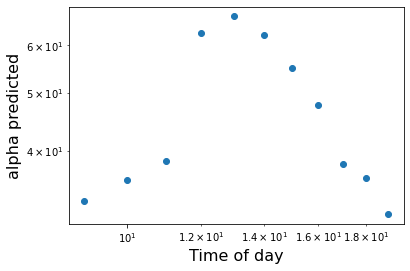

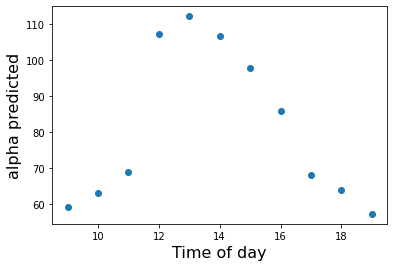

In [29]:
#Data for a daylong variation of operating conditions given
time = [9,10,11,12,13,14,15,16,17,18,19]

#alpha prediction for gamma =0
#Data with propane to fuel ratio (gamma)=0
operData = []
operData.append([ 287.0 ,  0, 490.0])
operData.append([ 295.0 ,  0, 720.0])
operData.append([ 301.0 ,  0, 980.0 ])
operData.append([ 305.0 ,  0, 2420.0])
operData.append([ 307.0 ,  0, 2570.0])
operData.append([ 308.0 ,  0, 2380.0])
operData.append([ 308.0 ,  0, 2075.0])
operData.append([ 305.0 ,  0, 1680.0])
operData.append([ 295.0 ,  0, 1000.0])
operData.append([ 292.0 ,  0, 800.0])
operData.append([ 295.0 ,  0, 250.0])
Nx = []
alpred=[]
for i in range(len(operData)):
    Nx.append([ operData[i][0]/Tmed , operData[i][1]/gamed , operData[i][2]/qsmed ])
operData = Nx
#calculating the predicted alpha using the model predict function
for i in range(len(operData)):
    test = [[ operData[i][0] , operData[i][1] , operData[i][2] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alpred.append(outpt[0][0]*almed)
#plot alpha predicted vs. time of the day
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(time,alpred)
plt.xlabel('Time of day', fontsize='16')
plt.ylabel('alpha predicted', fontsize='16')
plt.loglog()
plt.show()

#alpha prediction for gamma =0.5
#Data with propane to fuel ratio (gamma)=0.5
operData = []
operData.append([ 287.0 ,  0.5, 490.0])
operData.append([ 295.0 ,  0.5, 720.0])
operData.append([ 301.0 ,  0.5, 980.0 ])
operData.append([ 305.0 ,  0.5, 2420.0])
operData.append([ 307.0 ,  0.5, 2570.0])
operData.append([ 308.0 ,  0.5, 2380.0])
operData.append([ 308.0 ,  0.5, 2075.0])
operData.append([ 305.0 ,  0.5, 1680.0])
operData.append([ 295.0 ,  0.5, 1000.0])
operData.append([ 292.0 ,  0.5, 800.0])
operData.append([ 295.0 ,  0.5, 250.0])
Nx = []
alpred=[]
for i in range(len(operData)):
    Nx.append([ operData[i][0]/Tmed , operData[i][1]/gamed , operData[i][2]/qsmed ])
operData = Nx
#calculating the predicted alpha using the model predict function
for i in range(len(operData)):
    test = [[ operData[i][0] , operData[i][1] , operData[i][2] ]]
    testarray = np.array(test)
    outpt = model.predict(testarray)
    alpred.append(outpt[0][0]*almed)
#plot alpha predicted vs. time of the day
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(time,alpred)
plt.xlabel('Time of day', fontsize='16')
plt.ylabel('alpha predicted', fontsize='16')
plt.show()

## Task 2.4

### Modification one
activation function changed to elu from relu

In [30]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(16, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(32, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [31]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [33]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
60/60 [==============================] - 0s 163us/step - loss: 0.0626
Epoch 2/600
60/60 [==============================] - 0s 68us/step - loss: 0.0663
Epoch 3/600
60/60 [==============================] - 0s 61us/step - loss: 0.0701
Epoch 4/600
60/60 [==============================] - 0s 59us/step - loss: 0.0574
Epoch 5/600
60/60 [==============================] - 0s 54us/step - loss: 0.0516
Epoch 6/600
60/60 [==============================] - 0s 60us/step - loss: 0.0651
Epoch 7/600
60/60 [==============================] - 0s 65us/step - loss: 0.0740
Epoch 8/600
60/60 [==============================] - 0s 59us/step - loss: 0.0474
Epoch 9/600
60/60 [==============================] - 0s 58us/step - loss: 0.0629
Epoch 10/600
60/60 [==============================] - 0s 59us/step - loss: 0.0503
Epoch 11/600
60/60 [==============================] - 0s 63us/step - loss: 0.0655
Epoch 12/600
60/60 [==============================] - 0s 58us/step - loss: 0.0653
Epoch 13/600
60/60 [====

### Modification two
baseline neural network with an added layer and number of neurons in layers set to 12,24,12,12,2
All activation functions assigned as relu

In [34]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(12, activation=K.relu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(24, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [35]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [37]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
60/60 [==============================] - 0s 115us/step - loss: 0.0438
Epoch 2/600
60/60 [==============================] - 0s 68us/step - loss: 0.0439
Epoch 3/600
60/60 [==============================] - 0s 72us/step - loss: 0.0422
Epoch 4/600
60/60 [==============================] - 0s 69us/step - loss: 0.0450
Epoch 5/600
60/60 [==============================] - 0s 65us/step - loss: 0.0463
Epoch 6/600
60/60 [==============================] - 0s 71us/step - loss: 0.0444
Epoch 7/600
60/60 [==============================] - 0s 70us/step - loss: 0.0377
Epoch 8/600
60/60 [==============================] - 0s 65us/step - loss: 0.0452
Epoch 9/600
60/60 [==============================] - 0s 64us/step - loss: 0.0436
Epoch 10/600
60/60 [==============================] - 0s 67us/step - loss: 0.0577
Epoch 11/600
60/60 [==============================] - 0s 64us/step - loss: 0.0464
Epoch 12/600
60/60 [==============================] - 0s 71us/step - loss: 0.0427
Epoch 13/600
60/60 [====

### Modification three
baseline neural network with number of neurons changed to 8,16,8,2

In [41]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(8, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [42]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [44]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
60/60 [==============================] - 0s 145us/step - loss: 0.0554
Epoch 2/600
60/60 [==============================] - 0s 63us/step - loss: 0.0566
Epoch 3/600
60/60 [==============================] - 0s 62us/step - loss: 0.0631
Epoch 4/600
60/60 [==============================] - 0s 65us/step - loss: 0.0589
Epoch 5/600
60/60 [==============================] - 0s 63us/step - loss: 0.0561
Epoch 6/600
60/60 [==============================] - 0s 64us/step - loss: 0.0560
Epoch 7/600
60/60 [==============================] - 0s 63us/step - loss: 0.0538
Epoch 8/600
60/60 [==============================] - 0s 62us/step - loss: 0.0537
Epoch 9/600
60/60 [==============================] - 0s 55us/step - loss: 0.0555
Epoch 10/600
60/60 [==============================] - 0s 56us/step - loss: 0.0569
Epoch 11/600
60/60 [==============================] - 0s 62us/step - loss: 0.0582
Epoch 12/600
60/60 [==============================] - 0s 71us/step - loss: 0.0589
Epoch 13/600
60/60 [====

### Modification four
baseline neural network with number of neurons changed to 20,40,20,2

In [45]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(20, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(40, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(20, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [46]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [47]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,yarray,epochs=600,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))


Epoch 1/600
60/60 [==============================] - 0s 6ms/step - loss: 20.6707
Epoch 2/600
60/60 [==============================] - 0s 68us/step - loss: 17.5573
Epoch 3/600
60/60 [==============================] - 0s 64us/step - loss: 15.5973
Epoch 4/600
60/60 [==============================] - 0s 69us/step - loss: 14.0705
Epoch 5/600
60/60 [==============================] - 0s 69us/step - loss: 12.7999
Epoch 6/600
60/60 [==============================] - 0s 67us/step - loss: 11.6865
Epoch 7/600
60/60 [==============================] - 0s 68us/step - loss: 10.6863
Epoch 8/600
60/60 [==============================] - 0s 62us/step - loss: 9.7756
Epoch 9/600
60/60 [==============================] - 0s 70us/step - loss: 8.9406
Epoch 10/600
60/60 [==============================] - 0s 64us/step - loss: 8.1676
Epoch 11/600
60/60 [==============================] - 0s 63us/step - loss: 7.4427
Epoch 12/600
60/60 [==============================] - 0s 70us/step - loss: 6.7753
Epoch 13/600
60/60 

### Summary

- __Modification one:__<br>
  best epoch =  190<br>
  smallest loss = 0.03891446627676487<br>

- __Modification two:__<br>
  best epoch =  164<br>
  smallest loss = 0.03110383525490761<br>

- __Modification three:__<br>
  best epoch =  537<br>
  smallest loss = 0.0398373082280159<br>

- __Modification four:__<br>
  best epoch =  526<br>
  smallest loss = 0.03778704876701037<br>